<a href="https://colab.research.google.com/github/UOS-COMP6252/public/blob/main/lecture4/feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">COMP6252 Deep Learning Technologies</h1>
<h2 style="text-align: center;"> Lecture 4</h2>

## Feedforward Networks

- The aim of this session is learn how to use a Deep Neural Networks (DNN) using fully-connected layers and use it to tackle a classification problem
- In particular to regonize hand-written digits like below

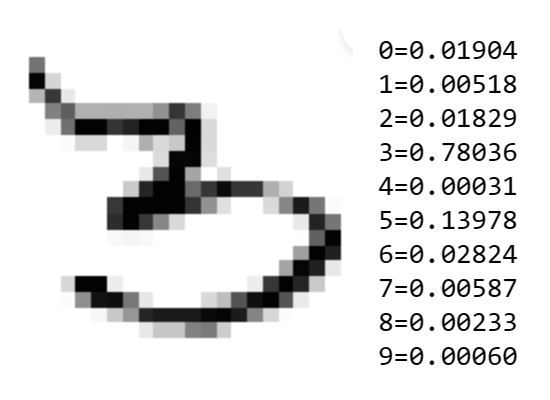

### Learning outcomes


1. Describe the working of a fully-connected neural network
1. Explain the importance of non-linear activation functions
1. Compare the properties of different activation functions (Sigmoid, tanh, ReLU, LReLU)
1. Construct a fully-connect neural network using PyTorch

In [ ]:
## We will be using comet_ml to log our experiments
import getpass
import os
try:
  import comet_ml
except ModuleNotFoundError:
  %pip install comet_ml
  import comet_ml
  comet_api_key=os.environ.get("COMET_API_KEY")
  if comet_api_key is None:
    comet_api_key=getpass.getpass("Enter key")

### Usual imports 

In [ ]:

import torch
import torchvision as tv
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torch.nn as nn
import matplotlib.pyplot as plt

## Datasets
- PyTorch has a number of builtin datasets 
(all subclasses of [toch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) ):
[audio datasets](https://pytorch.org/audio/stable/datasets.html), [text datasets](https://pytorch.org/vision/stable/datasets.html)
- We already have used CIFAR10
- In this session, we will be using another dataset from the  [image datasets](https://pytorch.org/text/stable/datasets.html)

### MNIST Dataset
- MNIST is a set of images of handwritten digits (0-9) with their corresponding labels. 
- the MNIST images are grayscale (one channel) with size 28x28.
- It is divided into a training part and test part. 

In [ ]:

train_data=tv.datasets.MNIST(".",download=True,train=True)
test_data=tv.datasets.MNIST(".",download=True,train=False)
print("# training samples={},test samples={}".format(len(train_data),len(test_data)))


In [ ]:
itr=iter(train_data)
fig=plt.figure()
fig.tight_layout()
plt.subplots_adjust( wspace=1, hspace=1)
for i in range(20):
            img,label=next(itr)
            t=fig.add_subplot(4,5,i+1)
            # set the title of the image equal to its label
            t.set_title(str(label))
            t.axes.get_xaxis().set_visible(False)
            t.axes.get_yaxis().set_visible(False)
            plt.imshow(img,cmap='gray_r')


- The data contains images with corresponding labels
- To use PyTorch we need to convert them to tensors
- Why didn't I do that from the beginning?

In [ ]:
train_data=tv.datasets.MNIST(".",download=True,train=True,transform=ToTensor())
test_data=tv.datasets.MNIST(".",download=True,train=False,transform=ToTensor())

### PyTorch tensors and DataLoaders
- Use ```DataLoader``` to retrieve data in batches for use in SGD 

In [ ]:
train_loader=DataLoader(train_data,batch_size=32,num_workers=2, shuffle=True)
test_loader=DataLoader(test_data,batch_size=32,num_workers=2,shuffle=False)


- In the cell below, what is the shape of **b** and **l**. Use ID 113-231-994

In [ ]:
itr=iter(train_loader)
b,l=next(itr)
print("b has shape=",b.size())
print("l has shape=",l.size())


## Feedforward Neural Network
- A feedforward or fully-connected network is a **generalization** of the single neuron model we have seen before
- A feedforward neural network is composed of a sequence of layers
- Each composed of multiple nodes. 
- The inputs to a node in layer ```L``` are the outpus of **all** nodes in the preceding layer ```L-1```. 


### Recall the single neuron model
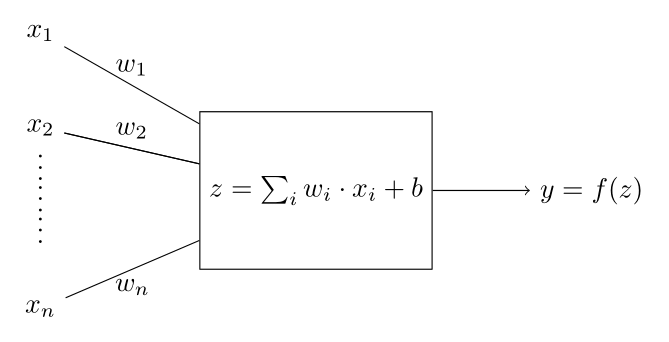

## Feedforward Neural Network Example



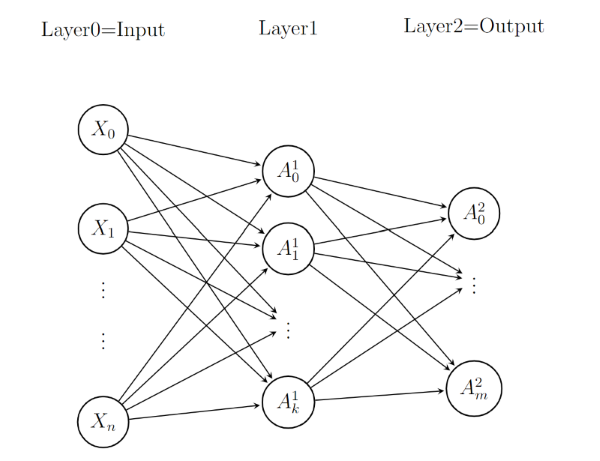

Let $A^k_i$,  $i=0\ldots m$ be the values at layer $k$ then for each node in layer $k+1$ is computed as follows

\begin{align*}
Z^k_j&=b^k_j+\sum_i  w^k_{ji}\cdot A^{k-1}_i \\
A^k_j&=f(Z^k_j)
\end{align*}

where

1. $w^k_{ji}$ are the weights, to be optimized.
1. $b^k_j$ are the biases, to be optimized.
1. $f$ is some non-linear function
1. $A^0_j$ are the inputs


### Why non-linear activation function?

- In the absence of  the non-linear activation function  the computation of each layer becomes a linear transformation.
- In that case, regardless of the number of layers, the computation would be equivalent to a single layer
- Which means there is no point in using more than one layer

### Why non-linear activation?
- The computation of a layer can be written in matrix form
\begin{align*}
Z^1&=B^1+W^1\cdot Z^0\\
Z^2&=B^2+W^2\cdot Z^1
\end{align*}
- so

\begin{align*}
Z^2&=B^2+W^2\cdot (B^1+W^1\cdot Z^0)\\
&=(B^2+W^2\cdot B^1)+(W^2\cdot W^1\cdot Z^0)\\
&=B+W\cdot Z^0
\end{align*}

### Feedforward in PyTorch

- We can create layers (minus the non-linear function) using PyTorch's ```torch.nn.Linear``` class.

```python
torch.nn.Linear(in_features,out_features)
```

- With the parameters initialized from a normal distribution.

### Example Computation

- Each MNIST image **imgs** has dimensions (1,28,28), so we need **flatten** the images before using them as input to the feedforward network. 
- The operation
```torch.flatten(img,start_dim=1)```

- What is the shape of ```imgs``` before and after flattening? batch=32 
- Use ID 113-231-994

In [ ]:
# create an iterator
itr=iter(train_loader)
# retrieve the next (img,label) batch of pairs
imgs,labels=next(itr)
print("before flattening the shape is {}".format(imgs.size()))
input=torch.flatten(imgs,start_dim=1)
print("After flattening the shape is {}".format(input.size()))

- A **single** layer network would be
```nn.Linear(in_features=d, out_features=10)```
- There are 10 digits, so ```out_features=10```
- We know that the input is a batch=32 of flattened images each of size 28x28
- Therefore ```d=784```. 
- ```nn.Linear``` "knows" that the data is processed in batches. 

In [ ]:
l=torch.nn.Linear(784,10)
# apply the layer to the input
output=l(input)
print("output size is {}".format(output.size()))

### Layer parameters

- For a single layer  $Z_j=b_j+\sum_i  w_{ji}\cdot X_i$  
- How many times is the ```while``` loop below executed?
- What are the shapes of the parameters? Use ID 113-231-994



In [ ]:
itr=iter(l.parameters())
while True:
    try:
        p=next(itr)
        print("parameters of size {}".format(p.size()))
    except StopIteration:
        break

## Activation function revisited
- Sigmoid activation was introduced in a previous session 
- The sigmoid is usually used as the activation of the last layer since it has values in the range (0,1). 
Recall
\begin{align*}
\sigma(z)=\frac{1}{1+e^{-z}}
\end{align*}

- It could be used as activation in the intermediate layers.
- Another option is to use 

$$tanh(z)=\frac{e^{z}-e^{-z}}{e^z+e^{-z}}$$

In [ ]:
import math
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1./(1.+math.exp(-z))
def tanh(z):
    return 2*sigmoid(2*z)-1
xmin,xmax=-10,10
y=[sigmoid(x) for x in range(xmin,xmax)]
z=[tanh(x) for x in range(xmin,xmax)]
plt.ylim(-1.1,1.1)
plt.plot(range(xmin,xmax),y,label='sigmoid')
plt.plot(range(xmin,xmax),z,label='tanh')
plt.legend()

- The sigmoid and tanh get flat very quickly (in both directions).
- The regions where they approach 1 can cause problems in learning.
- This is why tanh is not often used in the intermediate layers. Sigmoid even less.


- If the gradient for each layer is $\ll 1$  
- Then due to backpropagation a networks with many layers will stop learning
- This is called the **vanishing gradient** problem.

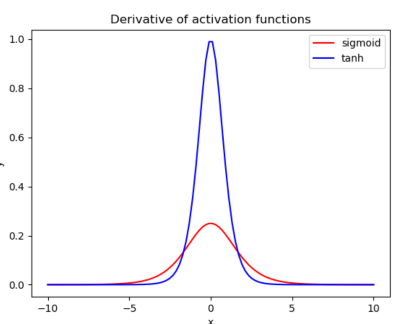


- A popular non-linear activation for the intermediate layers is the ReLU:

$$ ReLU(x)=\left\{\begin{align*}
x & \text{ for } x\ge 0\\
0 & \text{ for } x<0
\end{align*}\right.
$$


- There is also **leaky** ReLU. Typically $\alpha=0.01$ 


$$LReLU(x)=\left\{\begin{align*}
x & \text{ for } x\ge 0\\
\alpha x & \text{ for } x<0
\end{align*}\right.
$$

In [ ]:
def ReLU(x):
    if x >=0:
        return x
    return 0
def LReLU(x):
    if x>=0:
        return x
    return 0.01*x
x=[i for i in range(-10,10)]
u=[ReLU(z) for z in x]
v=[LReLU(z) for z in x]
plt.ylim(-0.1,2)
plt.plot(x,u,label='ReLU')
plt.plot(x,v,label='LReLU')
plt.legend()

## PyTorch Module

- We have seen how to subclass the ```nn.Module``` to create a single neuron, single layer network previously.
- We can take it further by creating a Module that itself contains other modules
- In particular, in this session, we construct a Module composed of 4 other Modules
- Each "submodule" is a Linear layer
- Each layer is connected to the next in a fully connected fashion


- There is no particular reason for the choice of the number/size of the layers. 
- The output of one layer **should match** the input of the next

In [ ]:
input_size=28*28
hidden_size1=128
hidden_size2=64
output_size=10

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1=nn.Linear(input_size,hidden_size1)
    self.layer2=nn.Linear(hidden_size1,hidden_size2)
    self.layer3=nn.Linear(hidden_size2,output_size)
    self.relu=nn.ReLU()
  def forward(self,x):
    x=x.flatten(start_dim=1)
    x=self.layer1(x)
    x=self.relu(x)
    x=self.layer2(x)
    x=self.relu(x)
    x=self.layer3(x)

    return x


In [ ]:
# Example output
itr=iter(train_loader)
imgs,labels=next(itr)
model=Net()
output=model(imgs)
output.size()

### Learning outcomes
1. Describe Softmax and Cross entropy and explain their intuitive meaning
1. Apply Softmax and Cross entropy loss to classification problems
1. Use PyTorch autograd and optimizers to train a fully-connected network
1. Compute the prediction accuracy of a trained fully-connected network
1. Use a GPU in Deep Learning

### Softmax

- The classification problem with $C$ possible classes is a generalization of the binary classification that we have encountered before.
- For a given input $x$, let the output of our neural network be a $C$-dimension vector, $\hat{y}$, with $C$, denoting the number of classes. 
- The probability that the input $x$ belongs to class $i\in C$ is given by the **softmax** function:

\begin{align*}
P(i)=\frac{e^{\hat{y}_i}}{\sum_{c=1}^C e^{\hat{y}_c}}
\end{align*}


### Cross Entropy loss
If the **true** label is class $j$ then the **cross entropy** loss is given by
\begin{align*}
\mathcal{L}=-\log{\frac{e^{\hat{y}_j}}{\sum_{c=1}^C e^{\hat{y}_c}}}
\end{align*}

### Intuition behind cross entropy loss

- Mathematics aside, one can understand the idea behind the cross entropy loss by considering a couple of edge cases. 
- Suppose that, for input $x$, the network outputs a vector containing $C$ values $[y_0,\ldots,y_{c-1}]$ and the "true" label corresponding to the input is $j$



1. If network predicted a high probability for label $j$, i.e.  $e^{\hat{y}_j}\gg e^{\hat{y}_k}$ for all $k\ne j$ then  $\sum_{c=1}^C e^{\hat{y}_c}\approx e^{\hat{y}_j}$ and we can write the loss
\begin{align*}
\mathcal{L}=-\log{\frac{e^{\hat{y}_j}}{\sum_{c=1}^C e^{\hat{y}_c}}}\approx -\log\frac{e^{\hat{y}_j}}{e^{\hat{y}_j}}=0
\end{align*}
2. If the network predicted a low probability for label $j$ then $\sum_{c=1}^C e^{\hat{y}_c}\gg e^{\hat{y}_j}$ so that $\frac{e^{\hat{y}_j}}{\sum_{c=1}^C e^{\hat{y}_c}}\rightarrow 0$ and the loss function becomes
\begin{align*}
\mathcal{L}=-\log{\frac{e^{\hat{y}_j}}{\sum_{c=1}^C e^{\hat{y}_c}}}\approx -\lim_{\epsilon\rightarrow 0}\log\epsilon\rightarrow \infty
\end{align*}


### Examples

In [ ]:
loss_fn=nn.CrossEntropyLoss()
# y is the prediction of the model
# it doesn't have to be normalized
# clearly the "highest probability" (12) is at index 1
y=torch.tensor([1.,12.,3.,4.])
# Compute the loss when the "true" label is 1
loss=loss_fn(y,torch.tensor(1))
print("Correct label is predicted with high prob.: loss={:.4f}".format(loss.item()))


In [ ]:
# Network did not predict the correct label
y=torch.tensor([1.,6.,8.,12.])
loss=loss_fn(y,torch.tensor(1))
print("loss when the correct label has low prob.={:.4f}".format(loss.item()))

In [ ]:
# Compare with the manually computing the cross entropy
norm=0.
for i in range(4):
    norm+=torch.exp(y[i])
print("\"Manual\", PyTorch")
print("{:.4f}  {:.4f}".format(-torch.log(torch.exp(y[1])/norm).item(),loss.item()))


When using batches, by default PyTorch averages the loss over the batches

In [ ]:
# Example cross entropy 2
# no averaging 
loss_fn=nn.CrossEntropyLoss(reduction='none')
y=torch.tensor([[1.,2.,3.,4.],[5,6,7,8]])
print("no average loss=",loss_fn(y,torch.tensor([1,3])))
loss_fn=nn.CrossEntropyLoss()
print("default loss=",loss_fn(y,torch.tensor([1,3])))


### Why didn't we use softmax in our model?

There are two places where the output of softmax is needed
1. In the computation of the loss
1. In the prediction of the correct label corresponding to the input



- In the first case, PyTorch ```CrossEntropyLoss``` implicitly uses softmax and therefore assumes that we are passing it raw "logits".

- In the second case, there is no need to compute softmax since our prediction selects the index of the output that has the highest probability. 
- Because softmax is a monotonically increasing function the index that has the largest logit will have the largest probability.



In [ ]:

experiment = comet_ml.Experiment(workspace="COMP6252",project_name="Feedforward",auto_metric_logging=False, auto_output_logging=False)

### Using the GPU

- Use of a GPU can improve drastically the speed of SGD iterations
- To use the GPU one needs first to **transfer** the data from main memory to GPU memory
- In training using each batch is transfered to the GPU before using it
- Since the model operations involve parameters in addition to data, we need to "transfer" the model to GPU as well

In [ ]:
import torch.optim as optim
lr=0.01
epochs=10
experiment.log_parameters({'lr':lr,'epochs':epochs})
model=Net()
model=model.cuda()
optimizer=optim.SGD(model.parameters(),lr=lr)
loss_fn=nn.CrossEntropyLoss()
running_loss=0.0

for epoch in range(epochs):
    for imgs,labels in train_loader:
        imgs=imgs.cuda()
        labels=labels.cuda()
        output=model(imgs)
    
        loss=loss_fn(output,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss=0.99*running_loss+0.01*loss.item()
    experiment.log_metrics({'loss':running_loss}, epoch=epoch)       
    print("loss {:.4f}".format(running_loss))

### Accuracy
- One import measure of any ML method is how well it "generalizes" on previously unseen data
- In this session we test the accuracy of prediction of the trained network on the test data
- This is done by comparing the predicted label with the "true" label
- The ```torch.max``` returns the maximum as well as argmax

In [ ]:
t=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(t.numpy())
m,arg=torch.max(t,dim=1)
print(m,arg)

In [ ]:
def evaluate(loader,model):
    total=0.
    for imgs,labels in loader:
        imgs=imgs.cuda()
        labels=labels.cuda()
        outputs=model(imgs)
        _,pred=torch.max(outputs,dim=1)
        total+=(pred==labels).sum()
    return total.item(),(total/len(loader.dataset)).item()

In [ ]:
nitems,accuracy=evaluate(test_loader,model)
experiment.log_metrics({"test_accuracy":accuracy})

### Testing the output for one sample

In [ ]:
# pick an arbitrary image and corresponding label
img,label=test_data[245]

In [ ]:
# Compute the output of the model for this image
with torch.no_grad():
    prob=nn.Softmax(1)(model(img.cuda()))
prob=prob.cpu().numpy().squeeze()
# We want to show the image so convert from tensor to PIL image
T=tv.transforms.ToPILImage()
img=T(img)

In [ ]:
plt.imshow(img,cmap='Greys')

In [ ]:
# print the predicted probabilities
for i,v in enumerate(prob):
    print("{}={:.5f}".format(i,v))

In [ ]:
experiment.end()